## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Loading the Data:

In [2]:
# Step 1: Loading the Data
train_data = pd.read_csv("/kaggle/input/diamond-price-prediciton-2024/train.csv")
test_data = pd.read_csv("/kaggle/input/diamond-price-prediciton-2024/test.csv")

## Exploring the Data

In [3]:
# Display the first few rows of the training dataset
train_data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [4]:
# Check for duplicates
train_data.duplicated().sum()

0

In [5]:
# Display the first few rows of the testing dataset
test_data.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


## Summary Statistics

In [6]:
# Print the summary of the dataframe
print(train_data.describe( include='all'))

                  Id         carat    cut  color clarity         depth  \
count   43152.000000  43152.000000  43152  43152   43152  43152.000000   
unique           NaN           NaN      5      7       8           NaN   
top              NaN           NaN  Ideal      G     SI1           NaN   
freq             NaN           NaN  17203   9060   10428           NaN   
mean    21576.500000      0.797855    NaN    NaN     NaN     61.747177   
std     12457.053745      0.473594    NaN    NaN     NaN      1.435454   
min         1.000000      0.200000    NaN    NaN     NaN     43.000000   
25%     10788.750000      0.400000    NaN    NaN     NaN     61.000000   
50%     21576.500000      0.700000    NaN    NaN     NaN     61.800000   
75%     32364.250000      1.040000    NaN    NaN     NaN     62.500000   
max     43152.000000      5.010000    NaN    NaN     NaN     79.000000   

               table         price             x             y             z  
count   43152.000000  43152.0000

In [7]:
train_data.describe(include = "object")

,cut,color,clarity
count,43152,43152,43152
unique,5,7,8
top,Ideal,G,SI1
freq,17203,9060,10428


## Unique Values

In [8]:
# Print unique values and their counts for the 'cut' column
print(train_data['cut'].unique())
print(train_data['cut'].value_counts())

['Ideal' 'Premium' 'Very Good' 'Fair' 'Good']
cut
Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: count, dtype: int64


In [9]:
# Print unique values and their counts for the 'color' column
print(train_data['color'].unique())
print(train_data['color'].value_counts())

['I' 'G' 'F' 'H' 'D' 'E' 'J']
color
G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: count, dtype: int64


In [10]:
# Print unique values and their counts for the 'clarity' column
print(train_data['clarity'].unique())
print(train_data['clarity'].value_counts())

['SI2' 'VVS2' 'VS2' 'IF' 'VS1' 'SI1' 'VVS1' 'I1']
clarity
SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: count, dtype: int64


## Visualizing the Data:

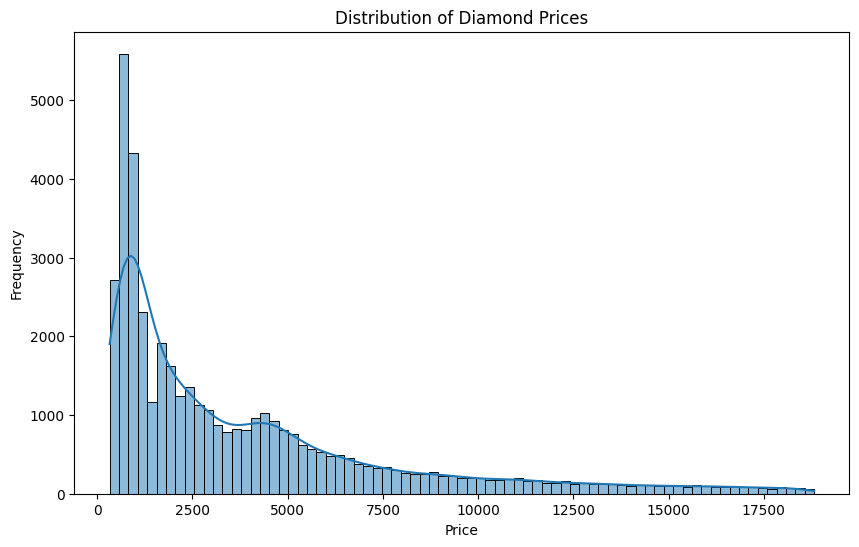

In [11]:
# Visualize the distribution of the target variable 'price'
plt.figure(figsize=(10, 6))
sns.histplot(train_data['price'], kde=True)
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

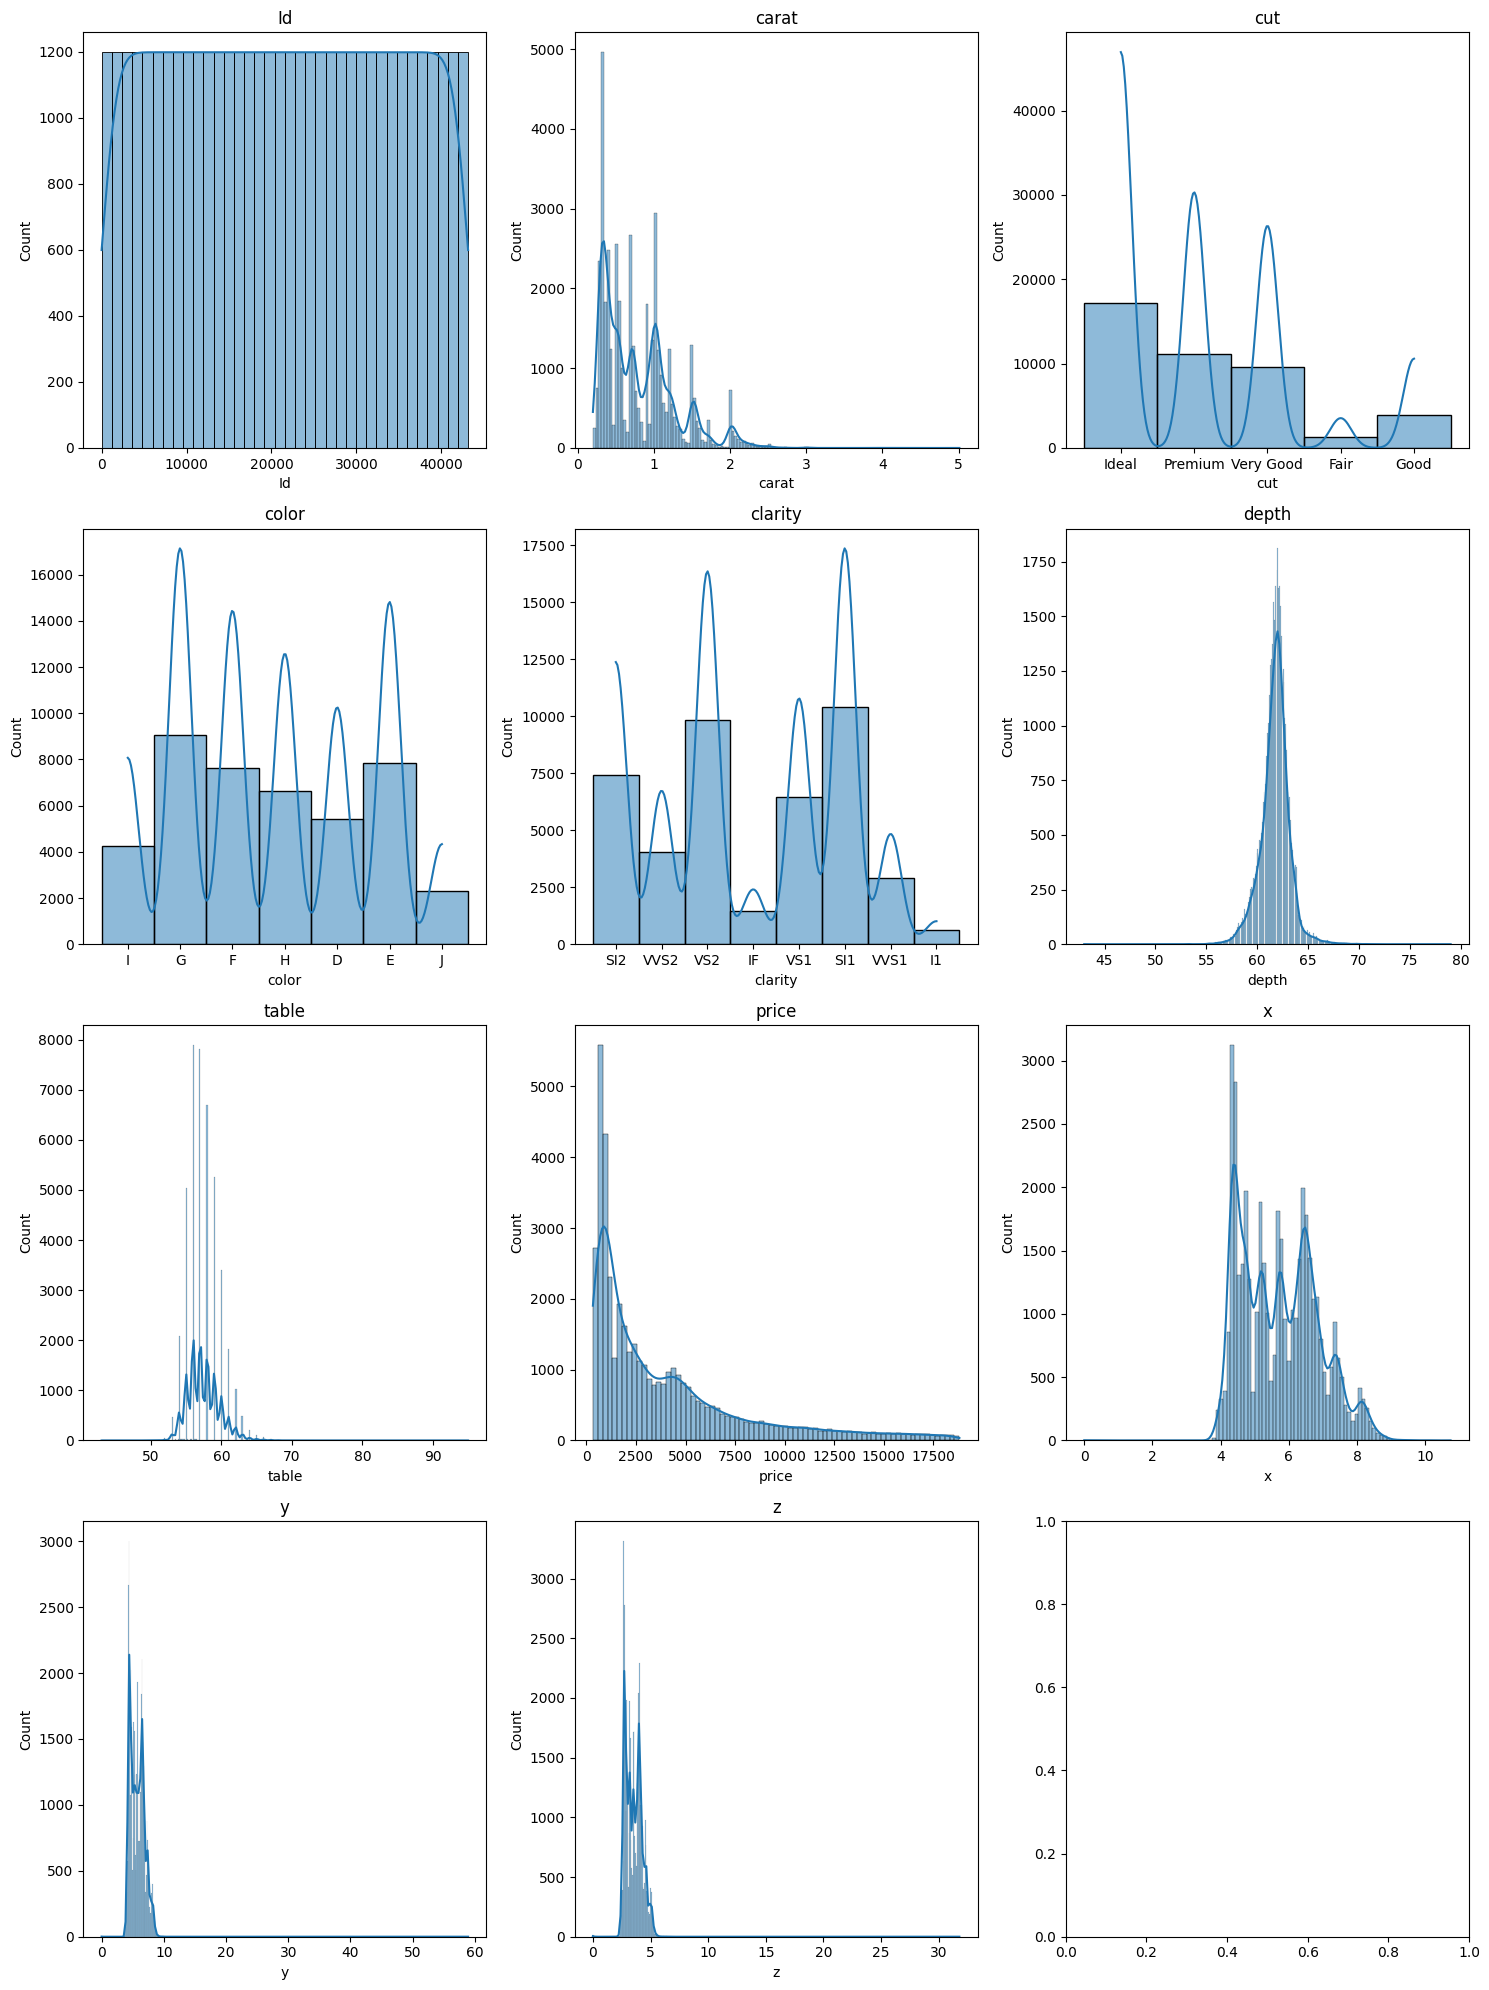

In [12]:
num_cols = train_data.shape[1]
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed for subplots

fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 5))

for i, column in enumerate(train_data.columns):
    row = i // 3  # Calculate the row index
    col = i % 3   # Calculate the column index
    sns.histplot(data=train_data, x=column, ax=axs[row, col], kde=True)
    axs[row, col].set_title(column)

plt.tight_layout()
plt.show()

In [13]:
# we can realize most of the data is not normally distributed so we have to use some kind of 
# log transformation
num_features=['carat','depth','table','price','x','y','z']
for feature in num_features:
    train_data[feature]=np.log(train_data[feature])

train_data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.058269,Ideal,I,SI2,4.123903,4.043051,8.359369,1.882514,1.887070,1.403643
1,2,0.412110,Premium,G,VVS2,4.109233,4.060443,9.626679,1.998774,2.004179,1.506297
2,3,-1.139434,Ideal,F,VS2,4.115780,4.025352,6.719013,1.488400,1.483875,0.996949
3,4,-0.634878,Ideal,G,VS2,4.114147,4.025352,7.363280,1.646734,1.652497,1.160021
4,5,-0.356675,Premium,H,VVS2,4.110874,4.043051,7.861727,1.750937,1.743969,1.252763


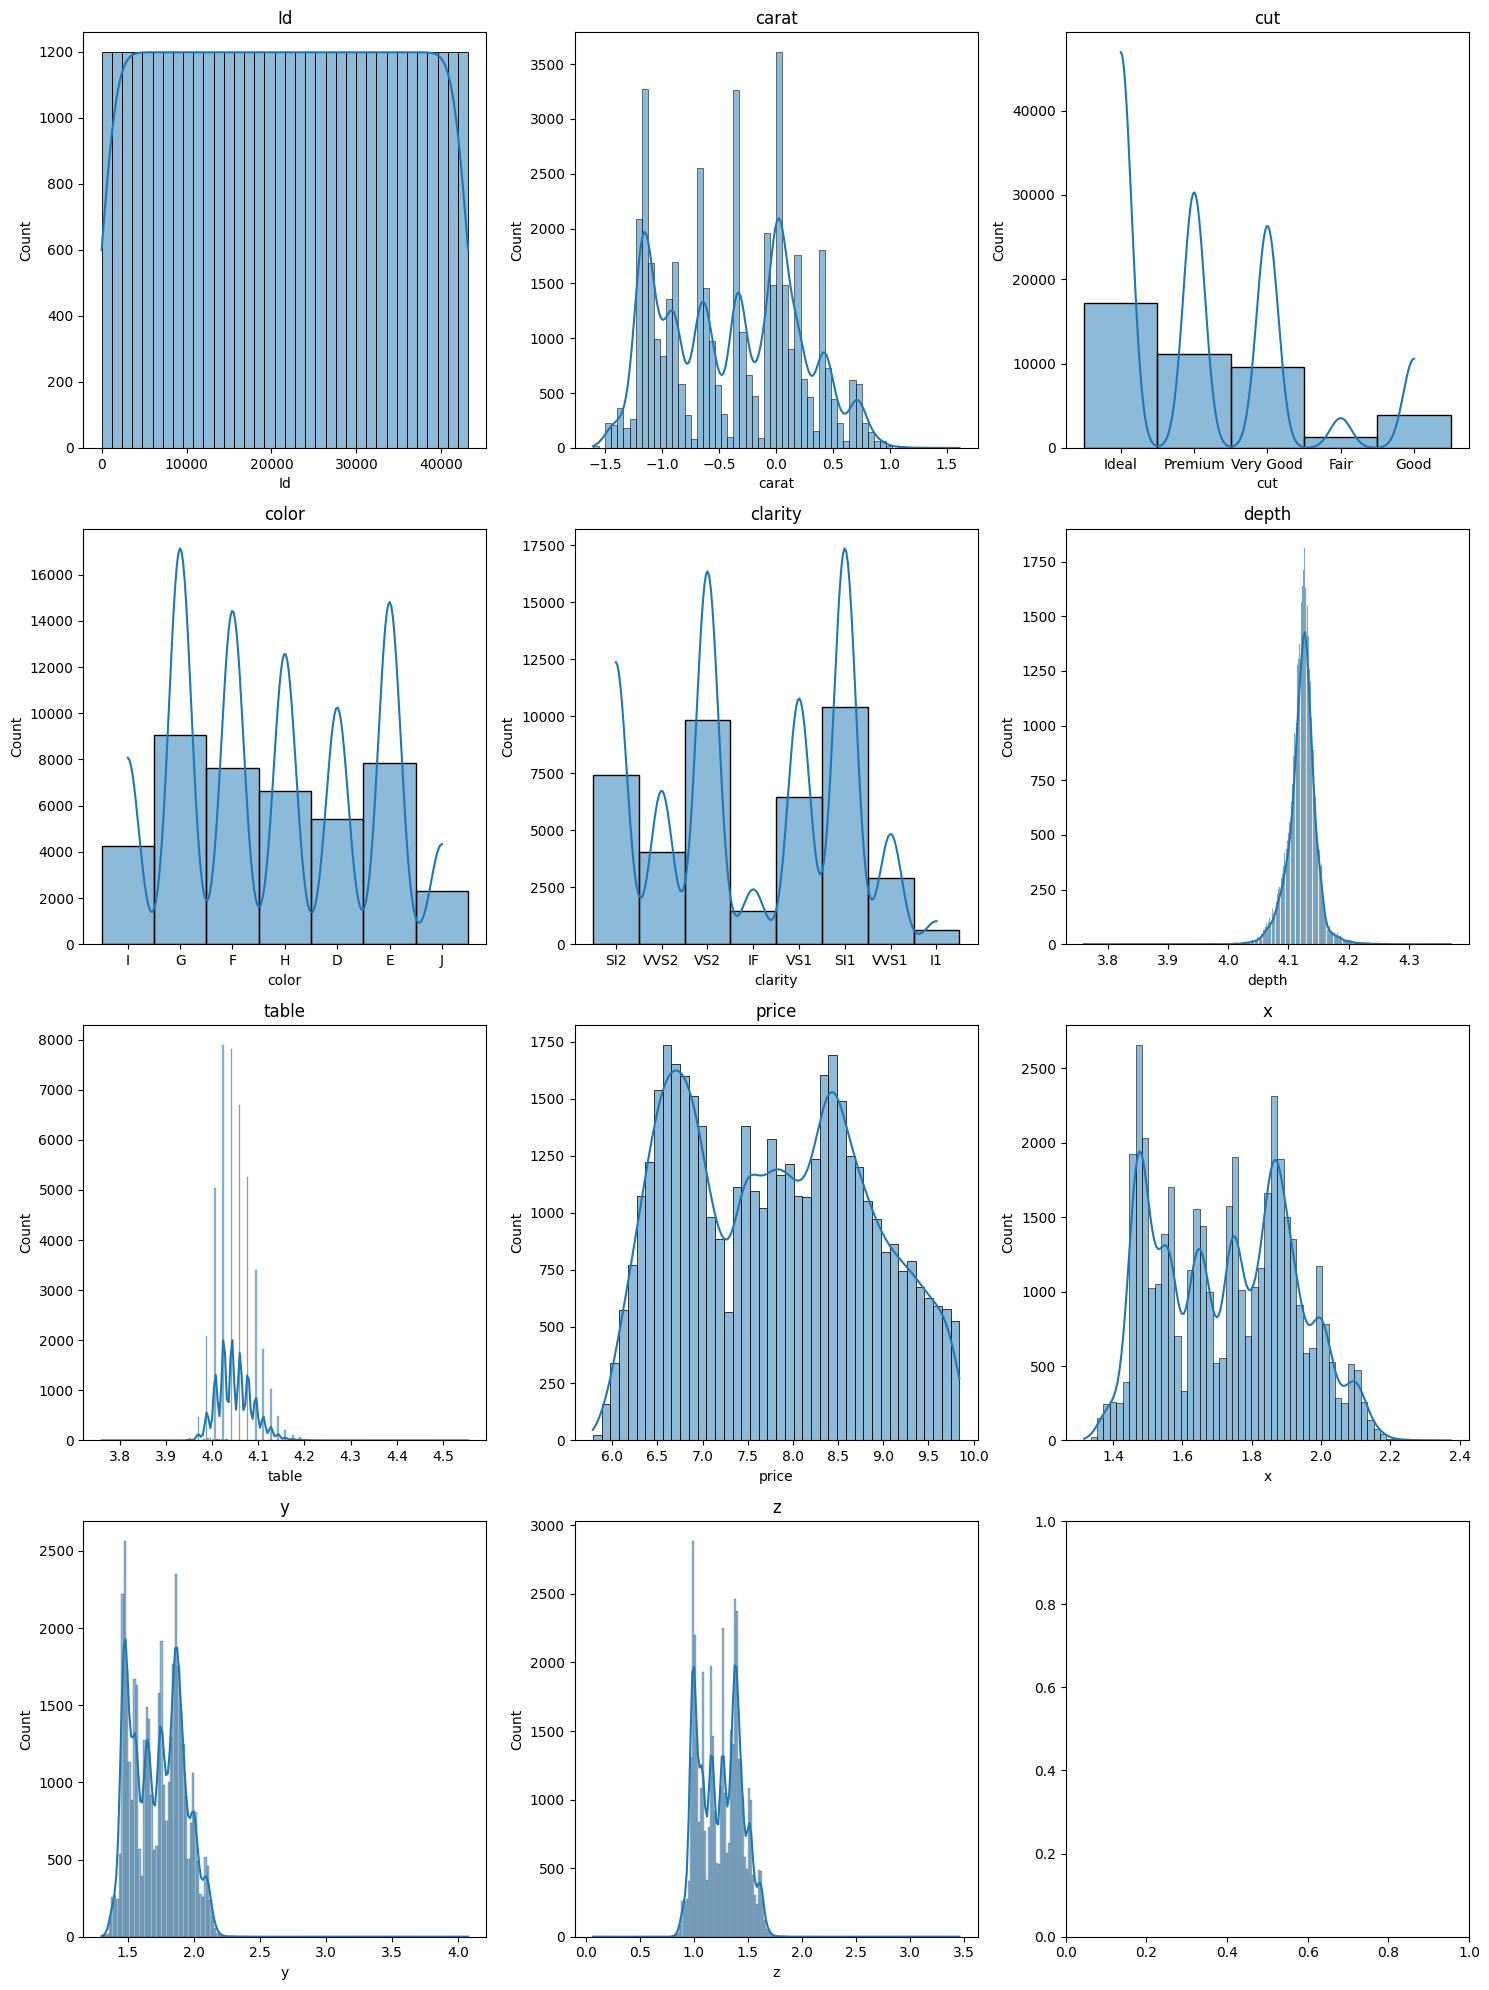

In [14]:
num_cols = train_data.shape[1]
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed for subplots

fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 5))

for i, column in enumerate(train_data.columns):
    row = i // 3  # Calculate the row index
    col = i % 3   # Calculate the column index
    sns.histplot(data=train_data, x=column, ax=axs[row, col], kde=True)
    axs[row, col].set_title(column)

plt.tight_layout()
plt.show()

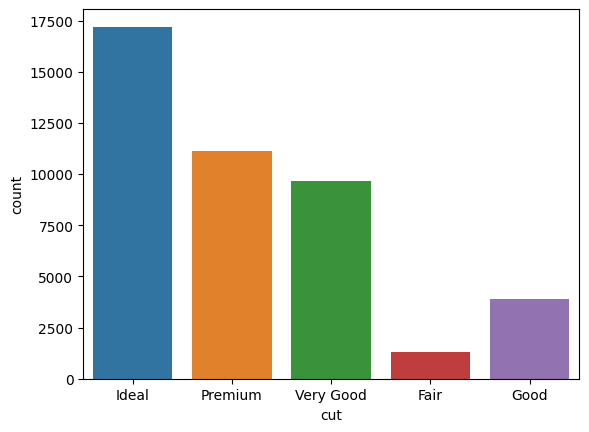

In [15]:
# Visualize the count of each 'cut' category
sns.countplot(x='cut', data=train_data)
plt.show()

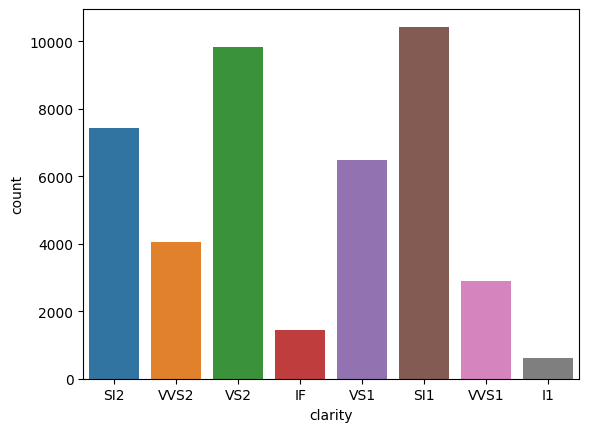

In [16]:
# Visualize the count of each 'clarity' category
sns.countplot(x='clarity', data=train_data)
plt.show()

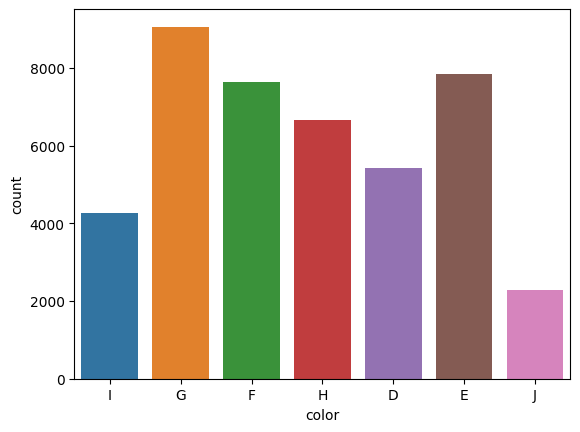

In [17]:
# Visualize the count of each 'color' category
sns.countplot(x='color', data=train_data)
plt.show()

## Preprocessing the Data:

In [18]:
# Check for missing values
train_data.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [19]:
# Remove rows with x, y, or z equal to 0
train_data = train_data[(train_data[['x', 'y', 'z']] != 0).all(axis=1)]

In [20]:
# Check the data types of each column
train_data.dtypes

Id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price      float64
x          float64
y          float64
z          float64
dtype: object

In [21]:
# Encode categorical variables using label encoding
label_encoder = LabelEncoder()
train_data['cut'] = label_encoder.fit_transform(train_data['cut'])
train_data['color'] = label_encoder.fit_transform(train_data['color'])
train_data['clarity'] = label_encoder.fit_transform(train_data['clarity'])

In [22]:
train_data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.058269,2,5,3,4.123903,4.043051,8.359369,1.882514,1.887070,1.403643
1,2,0.412110,3,3,7,4.109233,4.060443,9.626679,1.998774,2.004179,1.506297
2,3,-1.139434,2,2,5,4.115780,4.025352,6.719013,1.488400,1.483875,0.996949
3,4,-0.634878,2,3,5,4.114147,4.025352,7.363280,1.646734,1.652497,1.160021
4,5,-0.356675,3,4,7,4.110874,4.043051,7.861727,1.750937,1.743969,1.252763


## Correlation Analysis

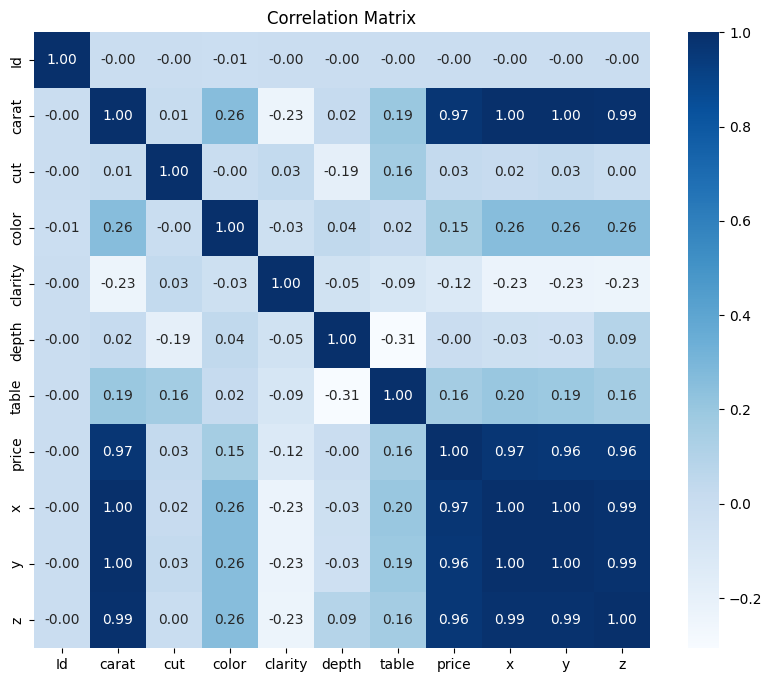

In [23]:
# Calculate the correlation matrix
correlation_matrix = train_data.corr()

# Plot the heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='Blues', annot=True, fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

## Explore Outliers

In [24]:
# Calculate outliers using IQR method
Q1 = train_data.quantile(0.25)
Q3 = train_data.quantile(0.75)
IQR = Q3 - Q1

# Marking the outliers in the DataFrame
outliers_mask = ((train_data[train_data.columns] < (Q1 - 1.5 * IQR)) | 
                 (train_data[train_data.columns] > (Q3 + 1.5 * IQR)))

# Counting the total number of outliers
total_outliers = outliers_mask.sum()
print("Total outliers for each variable:")
print(total_outliers)
print("Total outliers:", total_outliers.sum())

Total outliers for each variable:
Id            0
carat         1
cut        1297
color         0
clarity       0
depth      2166
table       473
price         0
x             6
y             6
z            23
dtype: int64
Total outliers: 3972


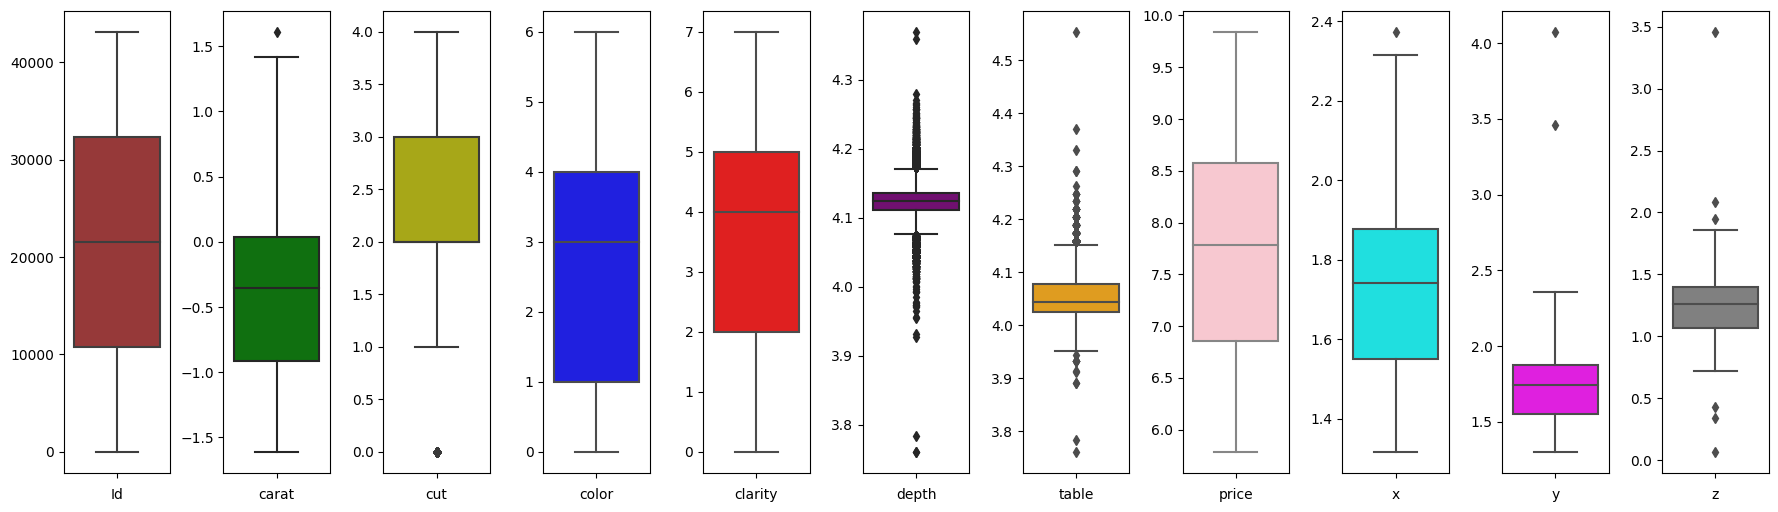

In [25]:
# Visualize boxplots after removing outliers
fig, ax = plt.subplots(1, 11, figsize=(22, 6))
plt.subplots_adjust(wspace=0.5)

variables = train_data.columns
colors = ['brown', 'g', 'y', 'b', 'r', 'purple', 'orange', 'pink', 'cyan', 'magenta','gray']
x_labels = train_data.columns

for i, variable in enumerate(variables):
    sns.boxplot(data=train_data[variable], ax=ax[i], color=colors[i])
    ax[i].set_xlabel(x_labels[i])
    ax[i].set_xticklabels([])

plt.show()

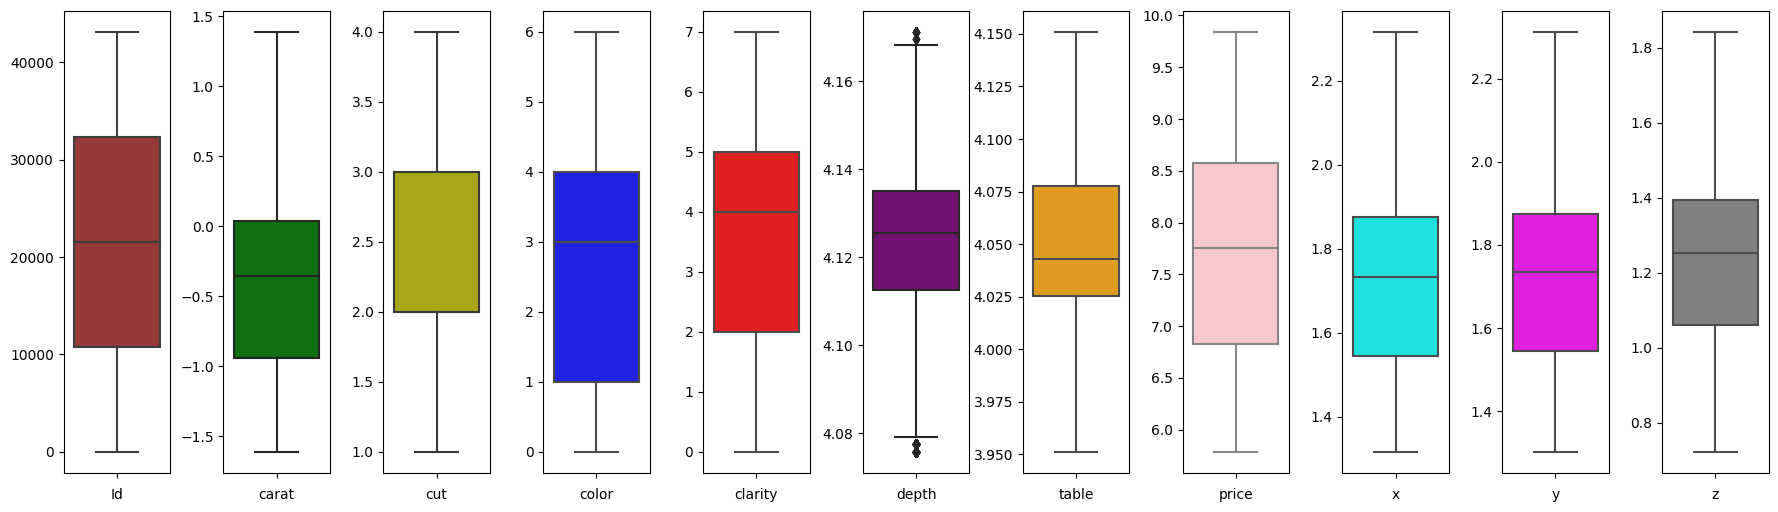

In [26]:
# Remove outliers from the DataFrame
df_no_outliers = train_data[~outliers_mask.any(axis=1)]

# Visualize boxplots after removing outliers
fig, ax = plt.subplots(1, 11, figsize=(22, 6))
plt.subplots_adjust(wspace=0.5)

variables = df_no_outliers.columns
colors = ['brown', 'g', 'y', 'b', 'r', 'purple', 'orange', 'pink', 'cyan', 'magenta','gray']
x_labels = df_no_outliers.columns

for i, variable in enumerate(variables):
    sns.boxplot(data=df_no_outliers[variable], ax=ax[i], color=colors[i])
    ax[i].set_xlabel(x_labels[i])
    ax[i].set_xticklabels([])

plt.show()

In [27]:
# Handle infinite values if present
has_infinite_values = np.any(np.isinf(train_data))
if has_infinite_values:
    columns_with_infinite_values = train_data.columns[np.any(np.isinf(train_data), axis=0)]
    for column in columns_with_infinite_values:
        train_data = train_data[~np.isinf(train_data[column])]
    has_infinite_values_after_handling = np.any(np.isinf(train_data))
    if has_infinite_values_after_handling:
        print("Infinite values still present after handling.")
    else:
        print("Infinite values handled successfully.")
else:
    print("No infinite values present in the data.")

Infinite values handled successfully.


## Prediction:

In [29]:
# Encode categorical variables using label encoding
label_encoder = LabelEncoder()
test_data['cut'] = label_encoder.fit_transform(test_data['cut'])
test_data['color'] = label_encoder.fit_transform(test_data['color'])
test_data['clarity'] = label_encoder.fit_transform(test_data['clarity'])

In [30]:
# Feature scaling
# scaler = MinMaxScaler()
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data.drop("price", axis=1))
# Drop the 'Id' column from the test data before scaling
test_data_scaled = scaler.transform(test_data)

In [31]:
# Training the Model
X = train_data_scaled
y = train_data["price"]

In [32]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rf=RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [42]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

KeyboardInterrupt: 

In [ ]:
y_pred=best_rf.predict(X_test)

In [ ]:
rmse_rf=np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Random Forest Rmse: {rmse_rf}")
mae=mean_absolute_error(y_test,y_pred)
print(f"Random Forest mae: {mae}")
mse=mean_squared_error(y_test,y_pred)
print(f"Random Forest mse: {mse}")
r2=r2_score(y_test,y_pred)
print(f"Random Forest r2socre: {r2}")  #performance of the model

In [ ]:
# Making predictions
predictions = best_rf.predict(test_data)

In [ ]:
# Create a DataFrame with the predicted prices
predictions_df = pd.DataFrame({'Id': test_data['Id'], 'price': predictions})

In [ ]:
# Save the predictions DataFrame to a CSV file
predictions_df.to_csv('/kaggle/working/submission.csv', index=False)